<img src="
https://raw.githubusercontent.com/minorharpman/ai_prog_pub/main/pandas/abrazolas.png"
 width="1000">

# Pandas: ábrázolás

In [1]:
# Importáljuk a pandas könyvtárat, amit általában "pd" néven szokás rövidíteni.
# A pandas egy Python könyvtár táblázatos (Excel-szerű) adatok kezelésére.
import pandas as pd

In [2]:
# Beolvasunk egy Excel fájlt DataFrame-be.
# A pd.read_excel() függvény egy Excel fájlt olvas be és DataFrame-et ad vissza.
# A DataFrame a pandas egyik legfontosabb adattípusa, egy táblázatszerű adatstruktúra.
df = pd.read_excel("mobil_bob_shop.xlsx")

In [3]:
# Új oszlopot hozunk létre 'bevétel' néven.
# A df['mennyiség'] és df['ár'] oszlopokat összeszorozzuk soronként.
# Ez szintén egy pandas Series típusú objektum, amit új oszlopként tárolunk.
df['Bevétel'] = df['Mennyiség'] * df['Ár']
df

,Termék,Mennyiség,Ár,Bevétel (eFt),Kategória,Régió,Akció,Dátum,Bevétel
0,Samsung Galaxy Watch,29,31367,909.643,Kiegészítő,Székesfehérvár,False,2025-06-15,909643
1,iPad Pro,14,118223,1655.122,Tablet,Székesfehérvár,True,2025-07-09,1655122
2,Oppo Find X5,10,176109,1761.090,Mobiltelefon,Szeged,False,2025-06-04,1761090
3,Panasonic TX,28,488628,13681.584,TV,Kecskemét,False,2025-05-29,13681584
4,Samsung QLED,20,748406,14968.120,TV,Győr,True,2025-06-07,14968120
...,...,...,...,...,...,...,...,...,...
995,Oppo Find X5,16,405636,6490.176,Mobiltelefon,Kecskemét,False,2025-04-15,6490176
996,MacBook Air,13,229292,2980.796,Laptop,Szeged,False,2025-04-30,2980796
997,Samsung Galaxy Tab S8,20,178929,3578.580,Tablet,Pécs,True,2025-07-11,3578580
998,Panasonic TX,17,178137,3028.329,TV,Pécs,False,2025-05-04,3028329


* A pivot tábla (angolul pivot table) a Pandas könyvtárban egy adatátalakítási és összegzési eszköz, amely lehetővé teszi, hogy egy DataFrame-ből könnyen áttekinthető, aggregált (összesített) formában nyerjünk ki adatokat.
* values= mely oszlop(oka)t szeretnéd aggregálni, összesíteni( Bevétel)
* index='Kategória' → ez lesz a sorindex (soronkénti bontás)
* columns='Régió' → ez lesz az oszlopok bontása (pl. külön oszlop minden régióhoz)
*  aggfunc='sum' → az aggregálási függvény: összeadás

In [4]:
# Pivot tábla
sum_pivot = pd.pivot_table(
    df,
    values='Bevétel',
    index='Kategória',
    columns='Régió',
    aggfunc='sum'
)
sum_pivot

Régió,Budapest,Debrecen,Győr,Kecskemét,Miskolc,Nyíregyháza,Pécs,Szeged,Székesfehérvár
Kategória,,,,,,,,,
Kiegészítő,23864765,25419251,36093540,41315127,29533520,27850238,23238675,38539013,33468835
Laptop,186734321,293537399,135555601,166374221,283890982,177599442,164833499,182066030,245821791
Mobiltelefon,158699297,106006430,90613249,119437359,143049292,202918894,142036276,80496347,161982953
TV,155631485,249737722,210531974,204175278,217555734,180116971,242790682,256951881,243279491
Tablet,84959064,94007216,121500816,98627742,152243672,73507398,108254633,96828964,151873487


# Ábrázolás Matplotlib grafikonrajzoló könyvtárral
(nem a Pandas része)

* A Matplotlib egy Python nyelvhez készült grafikonrajzoló könyvtár, amelyet elsősorban adatvizualizációra használnak.

* A pyplot modul a Matplotlib gyakran használt része.

* A Pandas könyvtárral jól együttműködik.

* A plot() a Matplotlib  függvénye az adatok vizuális megjelenítése céljából

In [5]:
import matplotlib.pyplot as plt

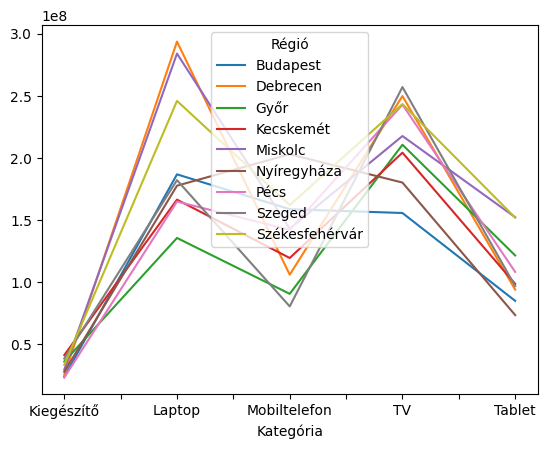

In [6]:
sum_pivot.plot( )

# Megjeleníti az ábrát (saját gépen, terminálban futtatott  programnál)
plt.show()

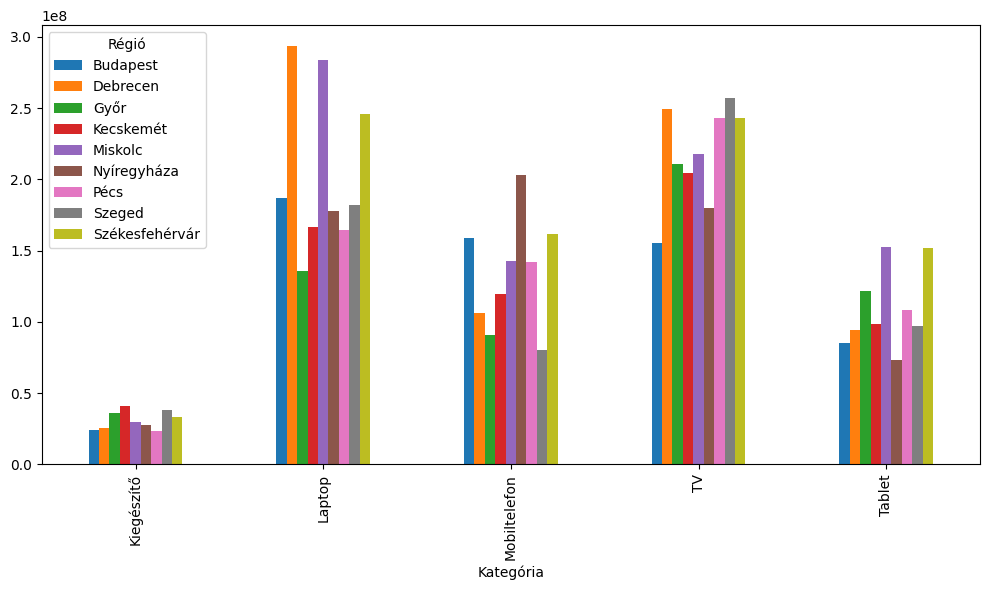

In [7]:
# Oszlopdiagram
sum_pivot.plot( kind='bar', figsize=(10, 6))

# Automatikusan elrendezi az alá- és fölérendelt grafikelemeket
plt.tight_layout()


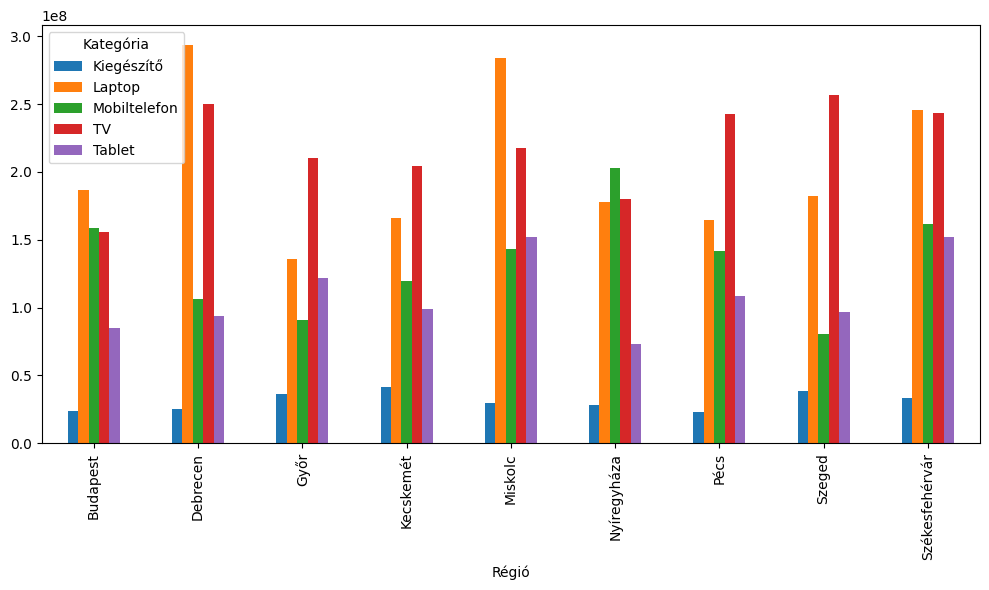

In [8]:
# Oszlopdiagram, Sorok , oszlopok felcserélve
# Transzponáljuk az adatokat, hogy a régiók legyenek a tengelyen (opcionális)
#.transpose() Ez felcseréli a sorokat és az oszlopokat a DataFrame-ben.
sum_pivot.transpose().plot(kind='bar', figsize=(10, 6))

# Automatikusan elrendezi az alá- és fölérendelt grafikelemeket
plt.tight_layout()


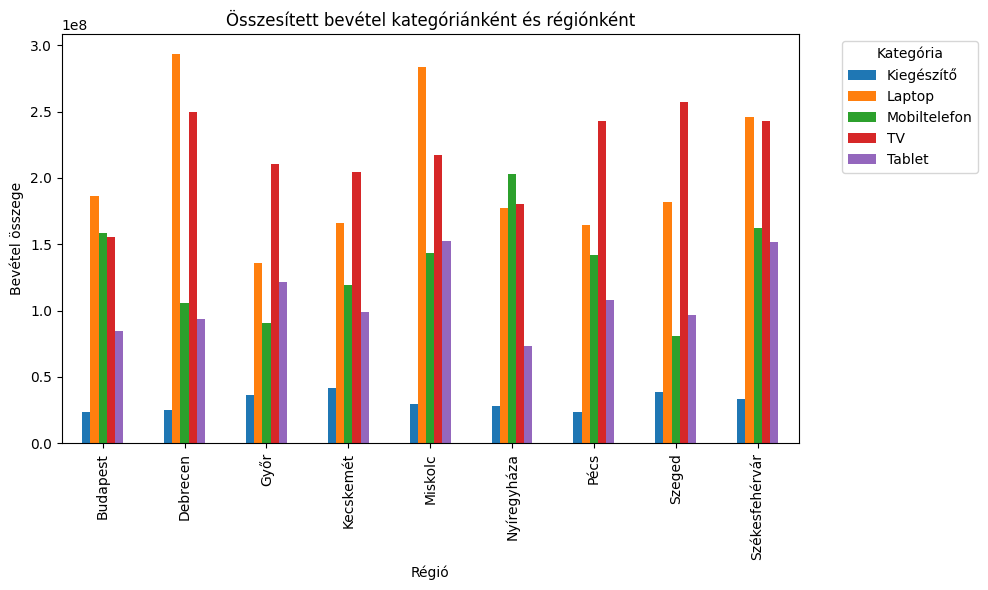

In [9]:
# 3. Címek és tengelyek megnevezése
sum_pivot.transpose().plot(kind='bar', figsize=(10, 6))
#grafikon, tengelyek elnevezése
plt.title('Összesített bevétel kategóriánként és régiónként')
plt.xlabel('Régió')
plt.ylabel('Bevétel összege')
plt.legend(title='Kategória', bbox_to_anchor=(1.05, 1), loc='upper left')

# 4. Megjelenítés
plt.tight_layout()
plt.show()

# Multi indexű pivot tábla ábrázolás: Akciós,  Nem akciós bevétel

In [10]:
pivot_df = pd.pivot_table(df, values='Bevétel', index=['Kategória', 'Akció'], columns='Régió', aggfunc='sum')
pivot_df

Régió                Budapest   Debrecen       Győr  Kecskemét    Miskolc  \
Kategória    Akció                                                          
Kiegészítő   False    8067602   10869385   20365597   25293688   11808840   
             True    15797163   14549866   15727943   16021439   17724680   
Laptop       False  102585625   94979123   80427932   84821593  202370857   
             True    84148696  198558276   55127669   81552628   81520125   
Mobiltelefon False   72569170   60645624   33876663   70746067   70874470   
             True    86130127   45360806   56736586   48691292   72174822   
TV           False  104978990  119463090  114401146  124076637  147238723   
             True    50652495  130274632   96130828   80098641   70317011   
Tablet       False   51200787   18712093   70876491   55309967  102216601   
             True    33758277   75295123   50624325   43317775   50027071   

Régió               Nyíregyháza       Pécs     Szeged  Székesfehérvár  
Kategória    Akció                                                     
Kiegészítő   False     15449615   10071064   21723998        25446898  
             True      12400623   13167611   16815015         8021937  
Laptop       False     87787562  100641947  103154992       126311446  
             True      89811880   64191552   78911038       119510345  
Mobiltelefon False    101584067   61768073   30003643        66549979  
             True     101334827   80268203   50492704        95432974  
TV           False     78266574   78848236   69201815        83707292  
             True     101850397  163942446  187750066       159572199  
Tablet       False     26918469   49289396   28746099        76311517  
             True      46588929   58965237   68082865        75561970

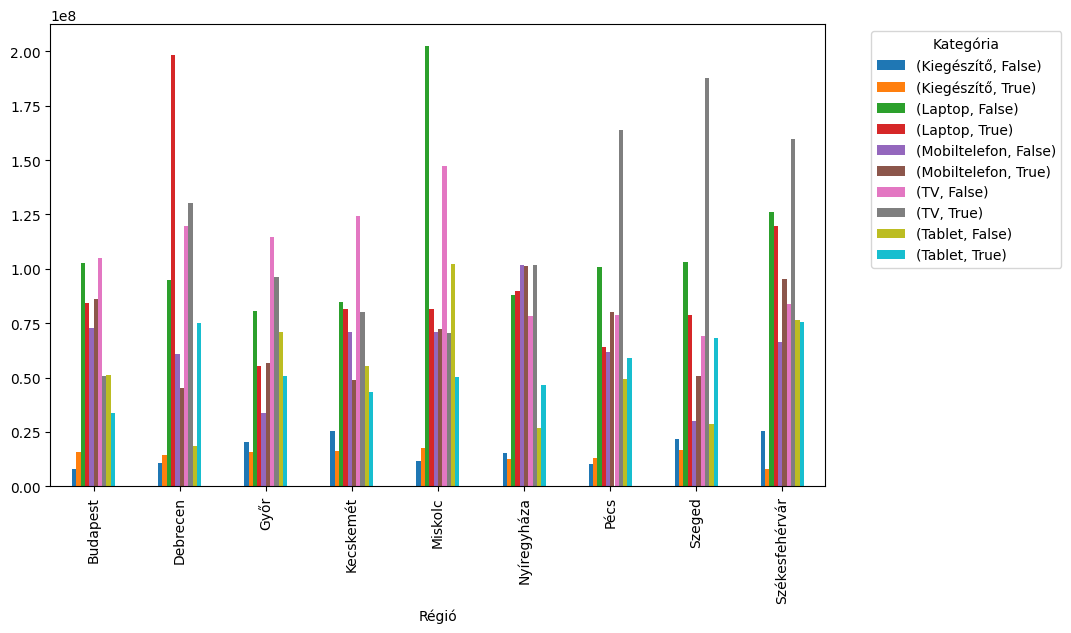

In [11]:
pivot_df.transpose().plot( kind='bar', figsize=(10, 6))
plt.legend(title='Kategória', bbox_to_anchor=(1.05, 1), loc='upper left')

In [12]:
szurt_df = df[df['Régió'].isin(['Budapest', 'Debrecen'])]
pivot_df = pd.pivot_table(szurt_df, values='Bevétel', index=['Kategória', 'Akció'], columns='Régió', aggfunc='sum')
szurt_pivot = pivot_df.loc[['Mobiltelefon', 'Laptop']]
#pivot_df
szurt_pivot

Régió                Budapest   Debrecen
Kategória    Akció                      
Mobiltelefon False   72569170   60645624
             True    86130127   45360806
Laptop       False  102585625   94979123
             True    84148696  198558276

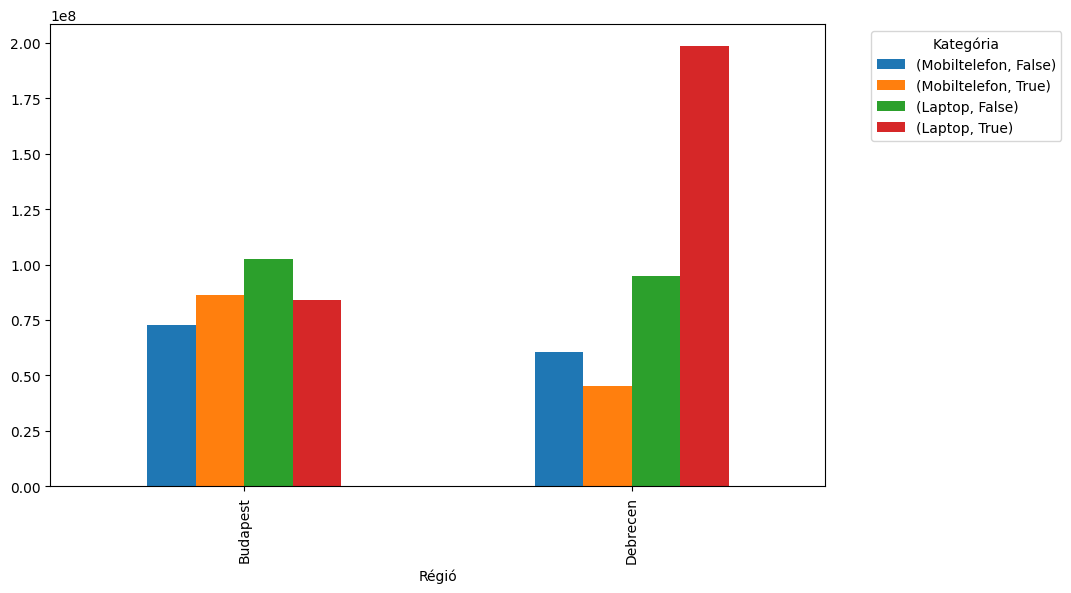

In [13]:
szurt_pivot.transpose().plot( kind='bar', figsize=(10, 6))
plt.legend(title='Kategória', bbox_to_anchor=(1.05, 1), loc='upper left')

# Akciós, Nem akciós címke




In [14]:
# másolatot készítünk, hogy az eredeti dataframe-t ne változtassuk meg.
df_1 = df.copy()

In [15]:
# apply-t az adattisztítás részben vettük
def akcio_szoveg(x):
    if x:
        return 'Akciós'
    else:
        return 'Nem akciós'

df_1['Akció'] = df_1['Akció'].apply(akcio_szoveg)
df_1

,Termék,Mennyiség,Ár,Bevétel (eFt),Kategória,Régió,Akció,Dátum,Bevétel
0,Samsung Galaxy Watch,29,31367,909.643,Kiegészítő,Székesfehérvár,Nem akciós,2025-06-15,909643
1,iPad Pro,14,118223,1655.122,Tablet,Székesfehérvár,Akciós,2025-07-09,1655122
2,Oppo Find X5,10,176109,1761.090,Mobiltelefon,Szeged,Nem akciós,2025-06-04,1761090
3,Panasonic TX,28,488628,13681.584,TV,Kecskemét,Nem akciós,2025-05-29,13681584
4,Samsung QLED,20,748406,14968.120,TV,Győr,Akciós,2025-06-07,14968120
...,...,...,...,...,...,...,...,...,...
995,Oppo Find X5,16,405636,6490.176,Mobiltelefon,Kecskemét,Nem akciós,2025-04-15,6490176
996,MacBook Air,13,229292,2980.796,Laptop,Szeged,Nem akciós,2025-04-30,2980796
997,Samsung Galaxy Tab S8,20,178929,3578.580,Tablet,Pécs,Akciós,2025-07-11,3578580
998,Panasonic TX,17,178137,3028.329,TV,Pécs,Nem akciós,2025-05-04,3028329


<Axes: xlabel='Régió'>

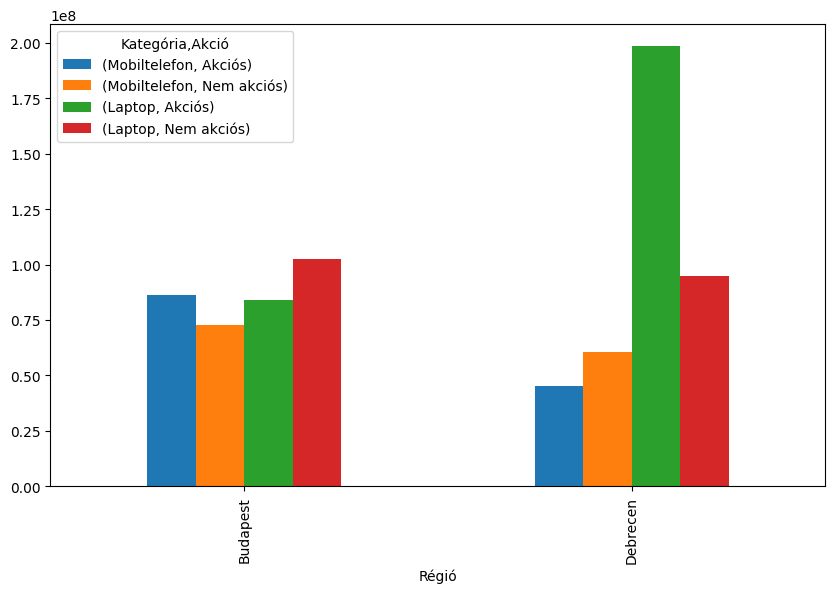

In [16]:
szurt_df = df_1[df_1['Régió'].isin(['Budapest', 'Debrecen'])]
pivot_df = pd.pivot_table(szurt_df, values='Bevétel', index=['Kategória', 'Akció'], columns='Régió', aggfunc='sum')
szurt_pivot = pivot_df.loc[['Mobiltelefon', 'Laptop']]
szurt_pivot.transpose().plot( kind='bar', figsize=(10, 6))

In [17]:
# másolatot készítünk, hogy az eredeti dataframe-t ne változtassuk meg.
df_2 = df.copy()
df_2

,Termék,Mennyiség,Ár,Bevétel (eFt),Kategória,Régió,Akció,Dátum,Bevétel
0,Samsung Galaxy Watch,29,31367,909.643,Kiegészítő,Székesfehérvár,False,2025-06-15,909643
1,iPad Pro,14,118223,1655.122,Tablet,Székesfehérvár,True,2025-07-09,1655122
2,Oppo Find X5,10,176109,1761.090,Mobiltelefon,Szeged,False,2025-06-04,1761090
3,Panasonic TX,28,488628,13681.584,TV,Kecskemét,False,2025-05-29,13681584
4,Samsung QLED,20,748406,14968.120,TV,Győr,True,2025-06-07,14968120
...,...,...,...,...,...,...,...,...,...
995,Oppo Find X5,16,405636,6490.176,Mobiltelefon,Kecskemét,False,2025-04-15,6490176
996,MacBook Air,13,229292,2980.796,Laptop,Szeged,False,2025-04-30,2980796
997,Samsung Galaxy Tab S8,20,178929,3578.580,Tablet,Pécs,True,2025-07-11,3578580
998,Panasonic TX,17,178137,3028.329,TV,Pécs,False,2025-05-04,3028329


In [18]:
df_2['Akció'] = df_2['Akció'].apply(akcio_szoveg)

In [19]:
df_2.head()

,Termék,Mennyiség,Ár,Bevétel (eFt),Kategória,Régió,Akció,Dátum,Bevétel
0,Samsung Galaxy Watch,29,31367,909.643,Kiegészítő,Székesfehérvár,Nem akciós,2025-06-15,909643
1,iPad Pro,14,118223,1655.122,Tablet,Székesfehérvár,Akciós,2025-07-09,1655122
2,Oppo Find X5,10,176109,1761.090,Mobiltelefon,Szeged,Nem akciós,2025-06-04,1761090
3,Panasonic TX,28,488628,13681.584,TV,Kecskemét,Nem akciós,2025-05-29,13681584
4,Samsung QLED,20,748406,14968.120,TV,Győr,Akciós,2025-06-07,14968120


In [20]:
szurt_df_2 = df_2[df_2['Régió'].isin(['Budapest'])]
pivot_df_2 = pd.pivot_table(szurt_df_2, values='Bevétel', index=['Kategória'], columns='Akció', aggfunc='sum')
pivot_df_2

Akció,Akciós,Nem akciós
Kategória,,
Kiegészítő,15797163,8067602
Laptop,84148696,102585625
Mobiltelefon,86130127,72569170
TV,50652495,104978990
Tablet,33758277,51200787


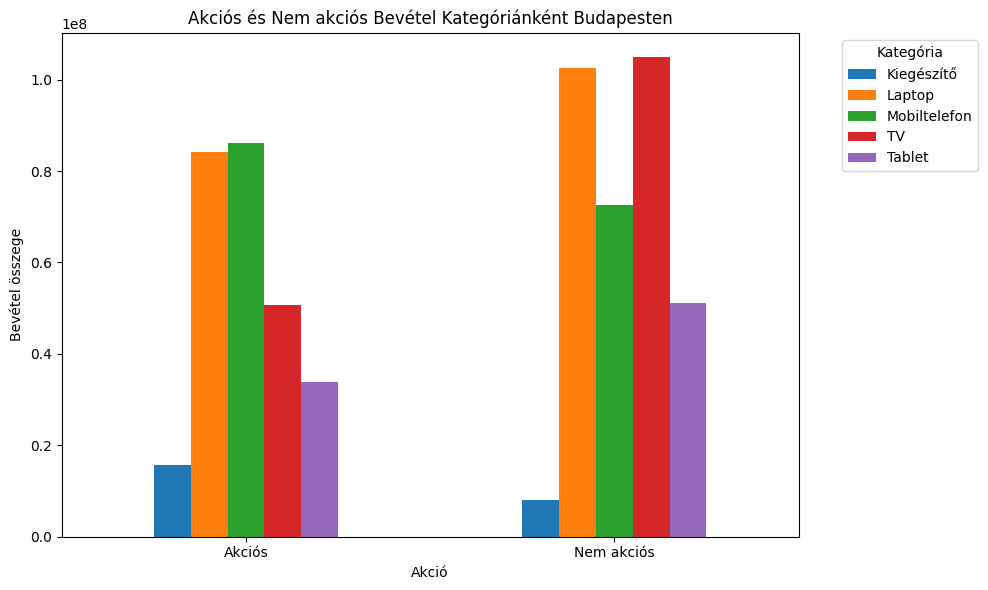

In [21]:
pivot_df_2.transpose().plot( kind='bar', figsize=(10, 6))
# 3. Címek és tengelyek megnevezése
plt.title('Akciós és Nem akciós Bevétel Kategóriánként Budapesten')
plt.xlabel('Akció')
plt.ylabel('Bevétel összege')
plt.legend(title='Kategória', bbox_to_anchor=(1.05, 1), loc='upper left')
# Itt történik az elforgatás
plt.xticks(rotation=0)
 # Opcionális: hogy ne lógjon ki a szöveg
plt.tight_layout()
plt.show()


In [22]:
##Gyakorlás
# 1. az első sortól lejátszás
# 2. külön munkafüzet (https://colab.research.google.com/) kód átmásolása
# 3. saját excel fájl feltöltés, az oszlopok átnevezése, tesztelés
# Visszajelzés, kérdések

# Összefoglalás

# DataFrame kiírása Excel fájlba

In [24]:
# index=False kikapcsolja a sorszámok mentését
# regio_kategoria.to_excel('output.xlsx', index=False)

pivot_df_2.to_excel('output.xlsx', index=True)